In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset/placement.csv")
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [3]:
df["cgpa"].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

<Axes: >

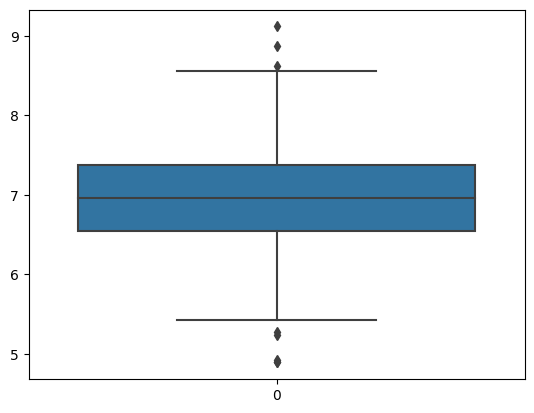

In [4]:
sns.boxplot(df["cgpa"])


C:\Users\patan\AppData\Local\Temp\ipykernel_16264\497839353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"])


<Axes: xlabel='cgpa', ylabel='Density'>

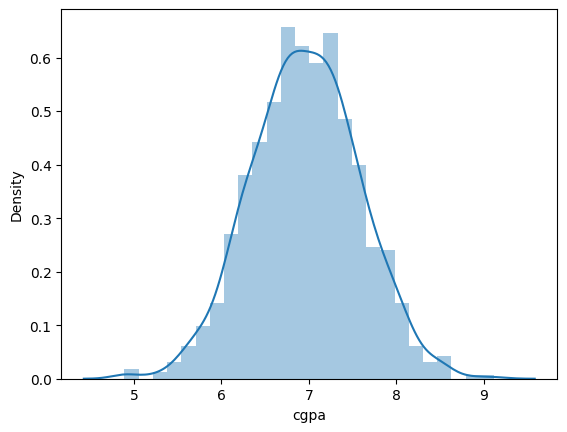

In [5]:
sns.distplot(df["cgpa"])

In [6]:
upper_limit = df["cgpa"].mean() + 3*df["cgpa"].std()
upper_limit

8.808933625397168

In [7]:
lower_limit = df["cgpa"].mean() - 3*df["cgpa"].std()
lower_limit

5.113546374602832

In [8]:
df["cgpa"].skew()

-0.014529938929314918

In [9]:
df["cgpa"].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

#  Remove the Outliers

In [10]:
#  Finding the outliers

In [11]:
df[(df["cgpa"]>=upper_limit) | (df["cgpa"]<=lower_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [12]:
#  Trimming

In [13]:
new_df = df[(df["cgpa"]<=upper_limit) & (df["cgpa"]>=lower_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [14]:
new_df["cgpa"].describe()

count    995.000000
mean       6.963357
std        0.600082
min        5.230000
25%        6.550000
50%        6.960000
75%        7.365000
max        8.620000
Name: cgpa, dtype: float64

In [15]:
df["cgpa"].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

<Axes: xlabel='cgpa', ylabel='Count'>

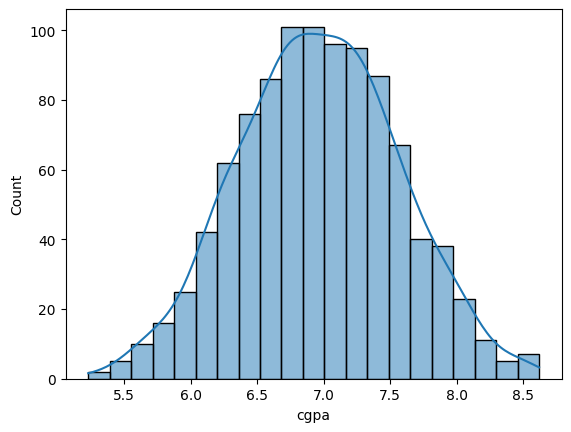

In [16]:
sns.histplot(new_df["cgpa"], kde=True)

<Axes: >

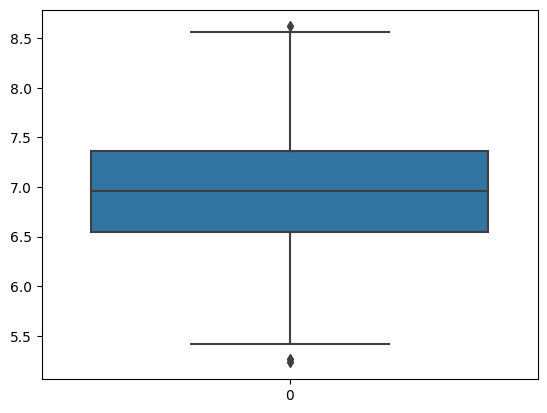

In [17]:
sns.boxplot(new_df["cgpa"])

In [18]:
#  Calculating Z_score

In [19]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [20]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [21]:
df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


#  Capping on outliers (Imputaion)

In [22]:
print(upper_limit)
lower_limit

8.808933625397168


5.113546374602832

In [23]:
new_df2 = df.copy()
new_df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [31]:
new_df2["cgpa"] = np.where(new_df2["cgpa"]>upper_limit, 
                           upper_limit,
                           np.where(new_df2["cgpa"]<lower_limit,
                                    lower_limit, 
                                    new_df2["cgpa"]))

# new_df2['cgpa'] = np.where(
#     new_df2['cgpa']>upper_limit,
#     upper_limit,
#     np.where(
#         new_df2['cgpa']<lower_limit,
#         lower_limit,
#         new_df2['cgpa']
#     )
# )
new_df2.shape

(1000, 4)

In [32]:
new_df2.tail()

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239
999,5.113546,10.0,1,-3.346724


In [33]:
df["cgpa"].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [34]:
new_df2["cgpa"].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

C:\Users\patan\AppData\Local\Temp\ipykernel_16264\1574307407.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2["cgpa"])


<Axes: xlabel='cgpa', ylabel='Density'>

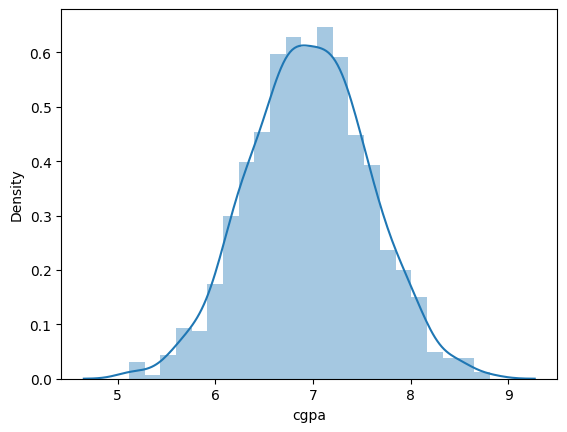

In [35]:
sns.distplot(new_df2["cgpa"])

C:\Users\patan\AppData\Local\Temp\ipykernel_16264\497839353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"])


<Axes: xlabel='cgpa', ylabel='Density'>

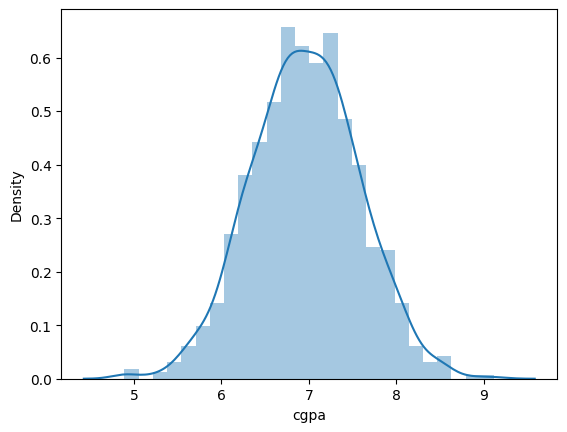

In [36]:
sns.distplot(df["cgpa"])

<Axes: >

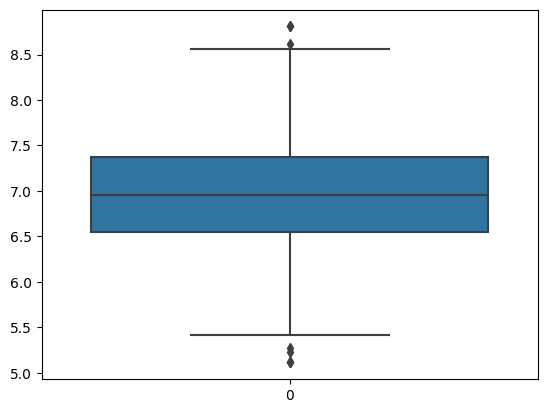

In [37]:
sns.boxplot(new_df2["cgpa"])